# Applied Data Science Capstone

This notebook will be mainly used for the capstone project: Segmenting and Clustering Neighborhoods in Toronto

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
<!-- #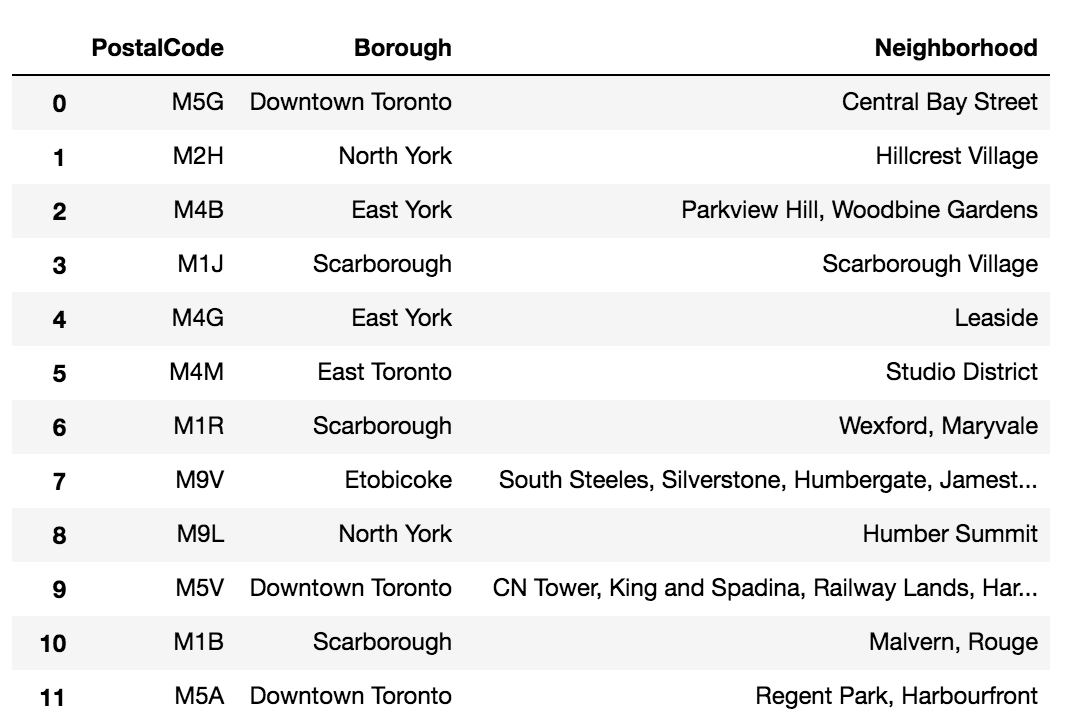 -->
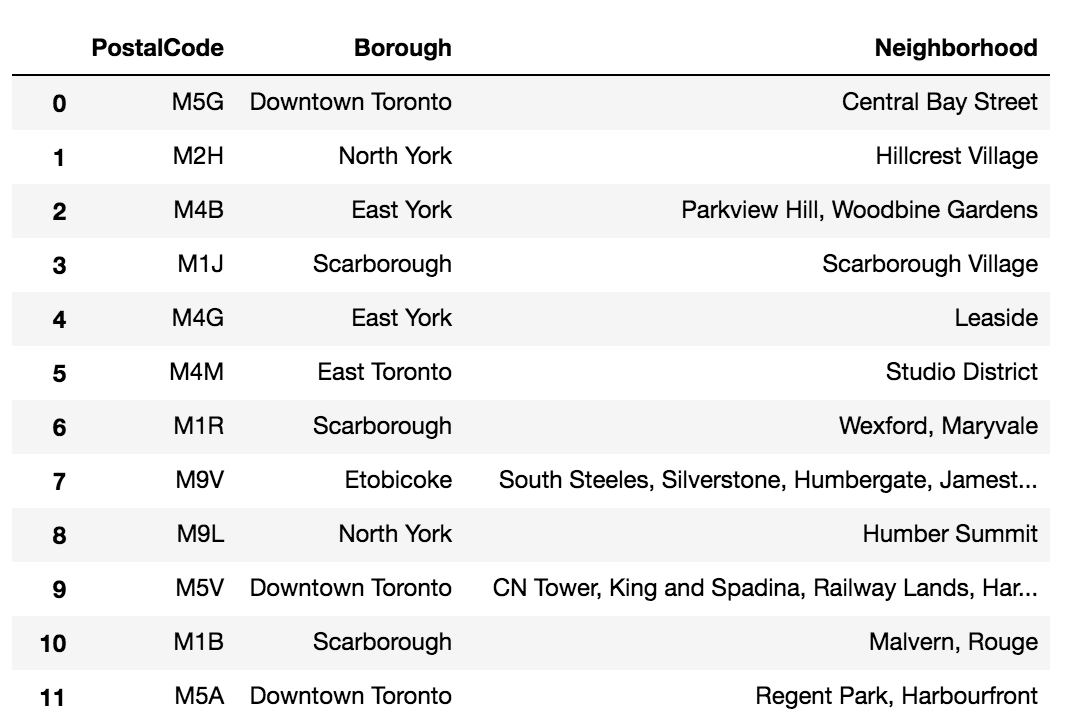
3. To create the above dataframe:
   - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
   - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
   - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

   - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
   - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
   - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
    
4. Submit a link to your Notebook on your Github repository. (10 marks)

In [ ]:
#import numpy and pandas
import numpy as np
import pandas as pd

print("libs imported!")

I'll use pandas to read the wikipedia table using the method read_html and extracting the first table with css class 'wikitable'. (es: pandas.read_html(url, attrs={'class': 'wikitable'}))   

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data = pd.read_html(url, attrs={'class': 'wikitable'})   
df = pd.concat(data)

#3.1 The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df.columns = ['PostalCode', 'Borough', 'Neighborhood']

#3.2 Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df['Borough'] != 'Not assigned']

#3.3  More than one neighborhood can exist in one postal code area. 
#     For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: 
#     Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = pd.DataFrame(df.groupby('PostalCode').agg(lambda x:', '.join(x.unique())))
df.reset_index(inplace=True)

#3.4 If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
#    So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
df[df['Neighborhood'] == 'Not assigned']

#for row in df.values:
#    if (row[2] ==  'Not assigned'):
#        row[2] = row[1]

df.loc[df.Neighborhood == 'Not assigned', 'Neighborhood'] = df.Borough
df[df['PostalCode'] == 'M9A']

df.head()

In [158]:
df.shape

(103, 3)